# 서울시 범죄 현황 분석

In [3]:
import pandas as pd
import numpy as np

In [2]:
!pip3 install pandas

     |████████████████████████████████| 11.3MB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 16.9MB 3.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
crime_anal_police = pd.read_csv("./data/02. crime_in_Seoul.csv", thousands = ",", encoding = "euc-kr")

In [7]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [10]:
# 구정보 얻기 위해 사용(주소, 위도, 경도 정보를 제공하는 서비스)
import googlemaps

In [9]:
!pip3 install googlemaps

  Running setup.py install for googlemaps ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
# 개인 키 번호 입력
gmaps_key = "****************************"
gmaps = googlemaps.Client(key=gmaps_key)

In [14]:
gmaps.geocode("서울중부경찰서", language = "ko")

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [17]:
station_name = []

for name in crime_anal_police["관서명"]:
    station_name.append("서울" + str(name[:-1]) + "경찰서")
    
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [24]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language = "ko")
    station_address.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")
    
    station_lat.append(tmp_loc["location"]["lat"])
    
    station_lng.append(tmp_loc["location"]["lng"])
    
    print(name+ "-->" + tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 녹번동 진흥로 58
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 신내동 신내역로3길 40-10
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 테헤란로114길 11
서울관악경찰서-->대한민국 서울특별시 관악구 청룡동 관악로5길 33
서울강서경찰서-->대한민국 서울특별시 강서구 화곡동 화곡로 308
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락동

In [25]:
station_address

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동 보문로 170',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 마포대로 183',
 '대한민국 서울특별시 영등포구 영등포동1가 618-7',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 녹번동 진흥로 58',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 신내동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 테헤란로114길 11',
 '대한민국 서울특별시 관악구 청룡동 관악로5길 33',
 '대한민국 서울특별시 강서구 화곡동 화곡로 308',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 구로동 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락동 중대로 221',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 

In [26]:
station_lat

[37.5636465,
 37.575548,
 37.5547584,
 37.5647439,
 37.5718529,
 37.5387099,
 37.58977830000001,
 37.58506149999999,
 37.550814,
 37.5153176,
 37.5617303,
 37.5130866,
 37.542873,
 37.6020914,
 37.63730390000001,
 37.4568722,
 37.6186095,
 37.5094352,
 37.4743945,
 37.5512463,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5167711,
 37.5016941,
 37.6425238,
 37.4945959,
 37.6280204,
 37.6533589,
 37.49349]

In [27]:
station_lng

[126.9895796,
 126.9847471,
 126.9734981,
 126.9667705,
 126.9989143,
 126.9659183,
 127.016589,
 127.0457679,
 126.954028,
 126.905728,
 127.0364217,
 126.9428498,
 127.083821,
 126.9213528,
 127.0273399,
 126.8970429,
 127.1045734,
 127.0669578,
 126.9513489,
 126.8499633,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656996,
 127.1272481,
 127.0717076,
 126.9831279,
 126.9287899,
 127.052682,
 127.0772119]

In [29]:
gu_name = []
for name in station_address:
    tmp = name.split()
    
    tmp_gu = [gu for gu in tmp if gu[-1] == "구"][0]
    
    gu_name.append(tmp_gu)
    
crime_anal_police["구별"] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [30]:
crime_anal_police[crime_anal_police["관서명"] == "금천서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [31]:
crime_anal_police.loc[crime_anal_police["관서명"] == "금천서", ["구별"]] = "관악구"
crime_anal_police[crime_anal_police["관서명"] == "금천서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


In [32]:
# 구 이름이 포함된 자료를 csv 로 변환하여 저장
crime_anal_police.to_csv("./data/02. crime_in_Seoul_include_gu_name.csv", sep = ",", encoding = "utf-8")

In [33]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


## 1. pandas pivot table 학습

In [39]:
df = pd.read_excel("./data/02. sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [38]:
!pip3 install openpyxl

     |████████████████████████████████| 245kB 2.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [41]:
pd.pivot_table(df, index=["Name"])
# 인덱스 외에 특별히 값을 지정해주지 않았다면 숫자형 데이터만 출력됨, value값을 평균으로 출력하는 것이 기본값

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [42]:
pd.pivot_table(df, index=["Name", "Rep", "Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [46]:
pd.pivot_table(df, index=["Manager", "Rep"], values = ["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [47]:
# 합계 출력(기본값은 평균)
pd.pivot_table(df, index = ["Manager", "Rep"], values = ["Price"], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [49]:
pd.pivot_table(df, index = ["Manager", "Rep", "Product"],
               values = ["Price", "Quantity"],
               aggfunc=[np.sum,np.mean], fill_value = 0, margins=True)
# fill_value : NaN 값을 0으로 채우기
# margins : Add all row / columns

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

## 다시 코드로.. (pivot_table 이용해서 데이터 정리하기)

In [50]:
crime_anal_raw = pd.read_csv("./data/02. crime_in_Seoul_include_gu_name.csv", encoding = "utf-8")
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [52]:
crime_anal_raw = pd.read_csv("./data/02. crime_in_Seoul_include_gu_name.csv", encoding = "utf-8", index_col=0)

crime_anal = pd.pivot_table(crime_anal_raw, index = "구별", aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,343,471,20,18,12,12,1715,4273,4418,5352


In [54]:
crime_anal["강간검거율"] = crime_anal["강간 검거"] / crime_anal["강간 발생"] * 100
crime_anal["강도검거율"] = crime_anal["강도 검거"] / crime_anal["강도 발생"] * 100
crime_anal["살인검거율"] = crime_anal["살인 검거"] / crime_anal["살인 발생"] * 100
crime_anal["절도검거율"] = crime_anal["절도 검거"] / crime_anal["절도 발생"] * 100
crime_anal["폭력검거율"] = crime_anal["폭력 검거"] / crime_anal["폭력 발생"] * 100

del crime_anal["강간 검거"]
del crime_anal["강도 검거"]
del crime_anal["살인 검거"]
del crime_anal["절도 검거"]
del crime_anal["폭력 검거"]

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,471,18,12,4273,5352,72.823779,111.111111,100.000000,40.135736,82.548580


In [56]:
# 검거율 중 100이 넘어가는 숫자가 있음 -> 전년도 발생건수가 포함된 것으로 예측, 우선 최대 100으로 설정
con_list = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,471,18,12,4273,5352,72.823779,100.000000,100.000000,40.135736,82.548580


In [58]:
# 이름 재설정
crime_anal.rename(columns = {"강간 발생" : "강간",
                             "강도 발생" : "강도",
                             "살인 발생" : "살인",
                             "절도 발생" : "절도",
                             "폭력 발생" : "폭력"}, inplace = True)

crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,471,18,12,4273,5352,72.823779,100.000000,100.000000,40.135736,82.548580


In [63]:
# 각 컬럼별로 정규화하기
from sklearn import preprocessing

col = ["강간", "강도", "살인", "절도", "폭력"]

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580


In [60]:
# 머신러닝 모듈 sckikit learn 전처리 도구(preprocessing) -> 최소, 최대값을 이용해서 정규화
!pip3 install sklearn

     |████████████████████████████████| 7.2MB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 32.6MB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 307kB 2.4MB/s eta 0:00:01
  Running setup.py install for sklearn ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [64]:
result_CCTV = pd.read_csv("./data/01. CCTV_result.csv", encoding = "utf-8", index_col = "구별")
crime_anal_norm[["인구수", "CCTV"]] = result_CCTV[["인구수", "소계"]]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496


In [65]:
col = ["강간", "강도", "살인", "절도", "폭력"]
crime_anal_norm["범죄"] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.390121
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.094698
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.500513
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.087685
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.598039


In [66]:
col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm["검거"] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.390121,369.707384
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.094698,370.084431
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.500513,406.943540
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.087685,417.767372
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.598039,395.508095


## 2. Seaborn

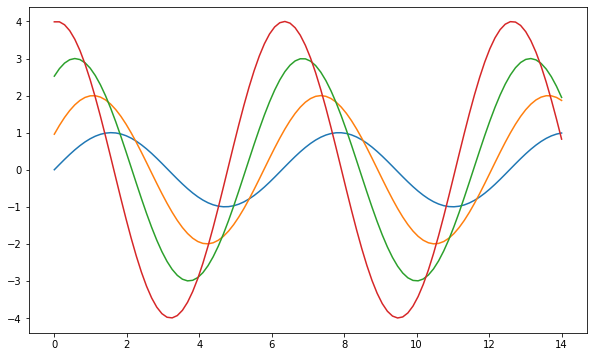

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x+1.0)
y4 = 4 * np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

In [68]:
!pip3 install matplotlib

     |████████████████████████████████| 7.2MB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 1.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
!pip3 install seaborn

     |████████████████████████████████| 296kB 1.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


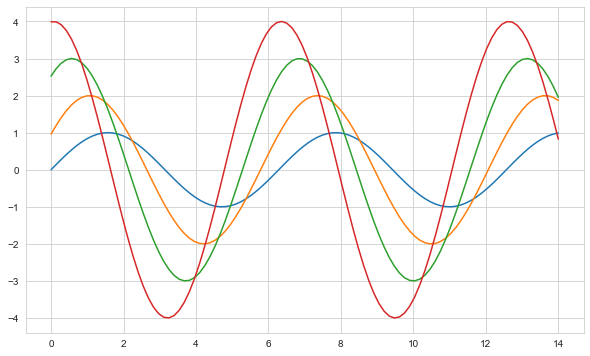

In [73]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

In [75]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


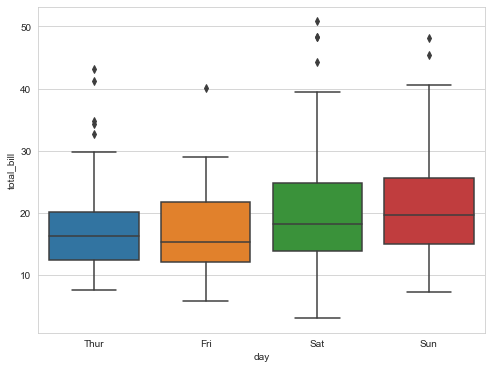

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

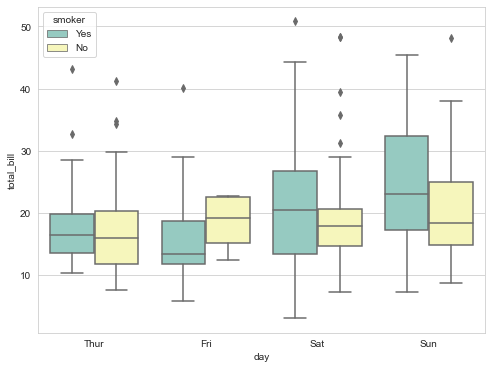

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


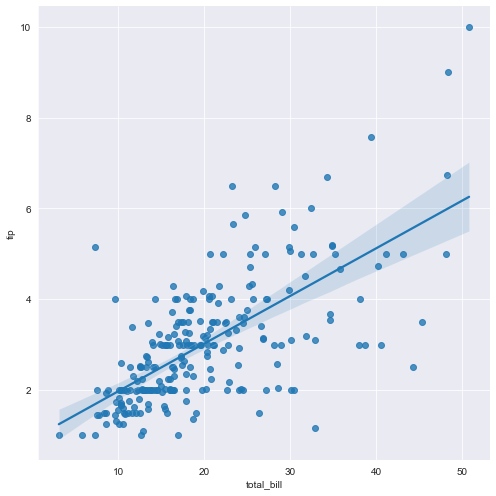

In [78]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, size=7)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


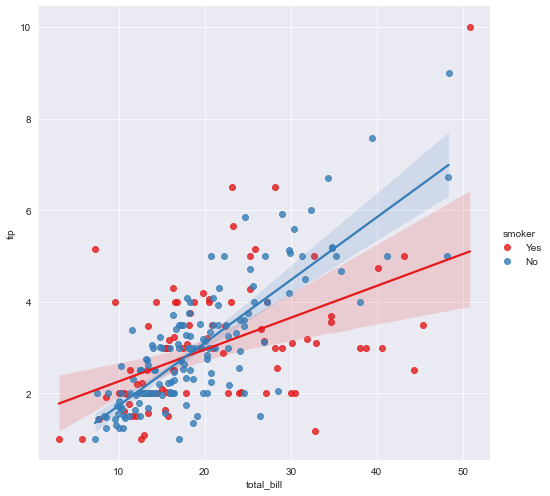

In [79]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", size=7)
plt.show()

In [80]:
flights = sns.load_dataset("flights")
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [81]:
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


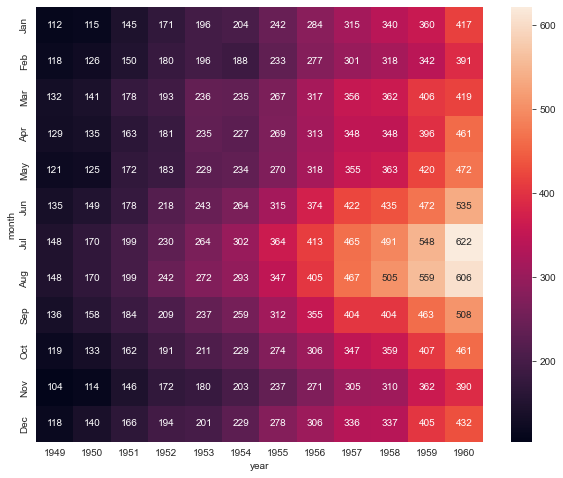

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot = True, fmt="d")
plt.show()

In [85]:
sns.set(style = "ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


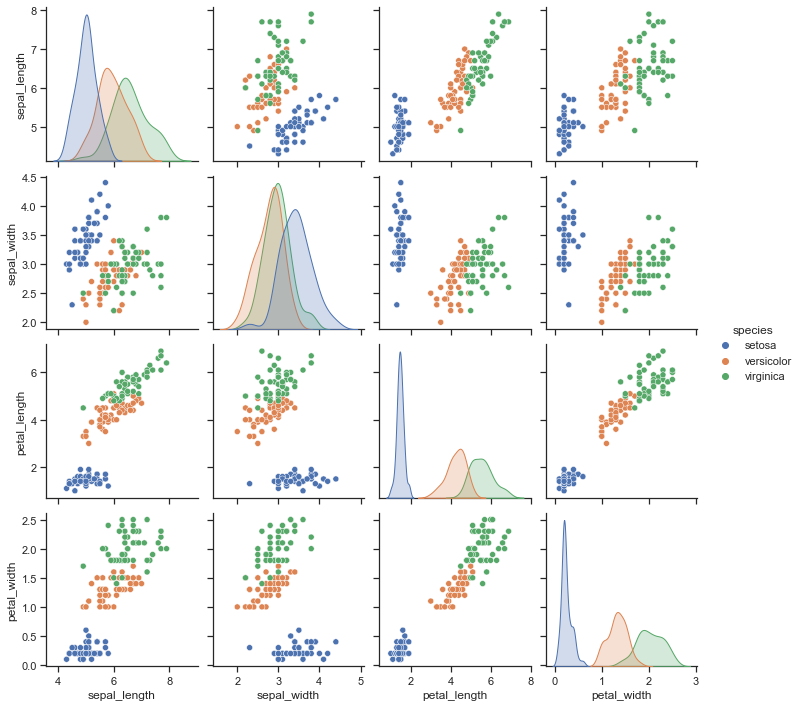

In [86]:
sns.pairplot(iris, hue="species")
plt.show()

# 다시 코드로.. (범죄 데이터 시각화하기)

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
from matplotlib import font_manager,rc

rc("font", family="AppleGothic")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


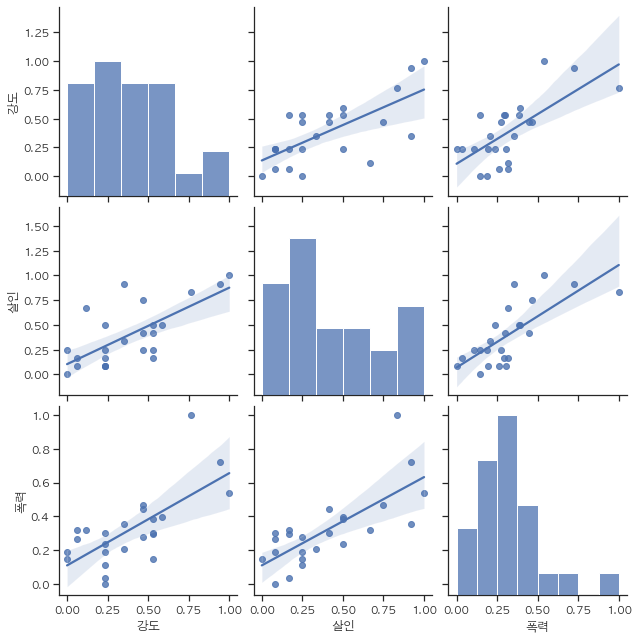

In [90]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind="reg", size=3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


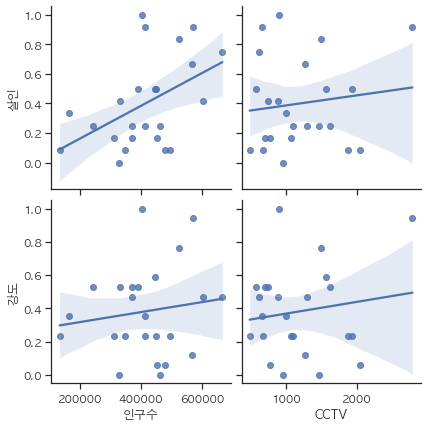

In [91]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"],
             y_vars = ["살인", "강도"], kind = "reg", size=3)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


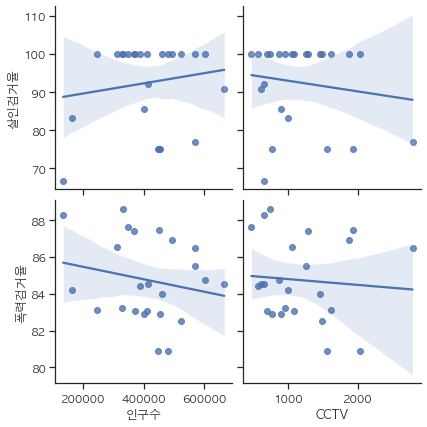

In [92]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"],
             y_vars = ["살인검거율", "폭력검거율"], kind = "reg", size=3)

plt.show()

In [94]:
tmp_max = crime_anal_norm["검거"].max()
crime_anal_norm["검거"] = crime_anal_norm["검거"] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending = False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.087685,96.572809
광진구,0.373984,0.529412,0.166667,0.611526,0.294437,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,1.976026,96.375820
동대문구,0.192412,0.470588,0.250000,0.285981,0.274515,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.473496,95.444250
용산구,0.249322,0.529412,0.250000,0.153894,0.145666,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.328295,94.776790


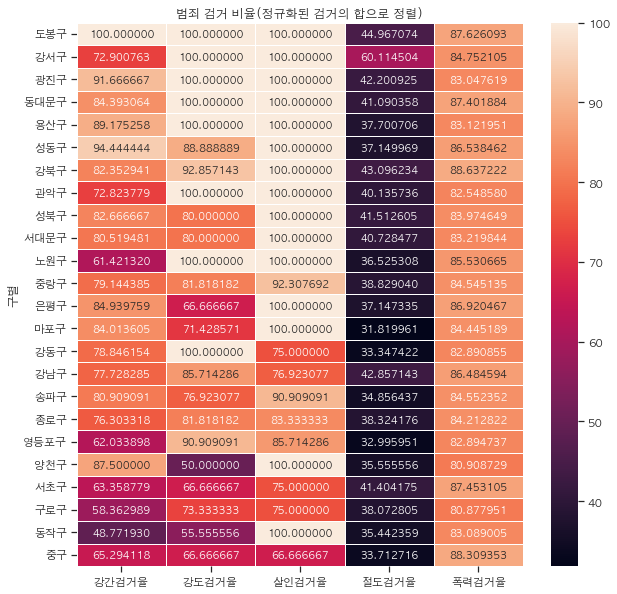

In [100]:
target_col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending = False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt="f", linewidths=0.5)
plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")
plt.show()

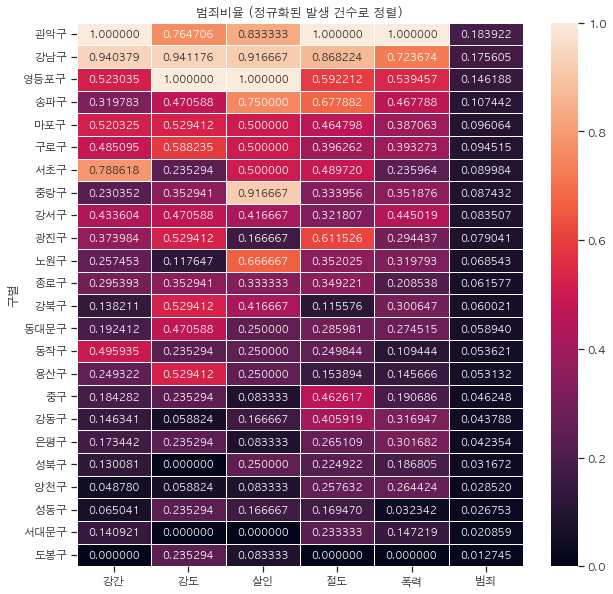

In [102]:
target_col = ["강간", "강도", "살인", "절도", "폭력", "범죄"]

crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending = False)
plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt="f", linewidths=.5)
plt.title("범죄비율 (정규화된 발생 건수로 정렬)")
plt.show()

In [103]:
crime_anal_norm.to_csv("./data/02. crime_in_Seoul_final.csv", sep=",", encoding="utf-8")

## 3. 지도 시각화 도구 Folium

In [106]:
import folium

In [105]:
!pip3 install folium

     |████████████████████████████████| 102kB 488kB/s ta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [110]:
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

In [111]:
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
stamen
# zoom_start : 확대비율 정의

In [112]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)
stamen

In [115]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles= "Stamen Toner", zoom_start=13)
folium.Marker([45.5244, -122.6699], popup="The Waterfront").add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, popup="Laurelhurst Park", color="#3186cc", fill_color="#3186cc").add_to(map_2)

map_2

In [116]:
import folium
import pandas

In [117]:
state_unemployment = "./data/02. folium_US_Unemployment_Oct2012.csv"

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [118]:
state_geo = "./data/02. folium_us-states.json"


map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data, columns = ["State", "Unemployment"],
              key_on="feature.id",
              fill_color="YlGn",
              legend_name="Unemployment Rate (%)")

map

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 다시 코드로.. (서울시 범죄율에 대한 지도 시각화)

In [125]:
import json
geo_path = "./data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [131]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")
map.choropleth(geo_data=geo_str, data= crime_anal_norm["살인"],
              colums = [crime_anal_norm.index, crime_anal_norm["살인"]],
              fill_color = "PuRd",
              key_on="feature.id")

map

In [132]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")

map.choropleth(geo_data=geo_str, data=crime_anal_norm["강간"],
                columns=[crime_anal_norm.index, crime_anal_norm["강간"]],
                fill_color = "PuRd",
                key_on = "feature.id")

map

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [133]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")

map.choropleth(geo_data=geo_str, data=crime_anal_norm["범죄"],
                columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],
                fill_color = "PuRd",
                key_on = "feature.id")

map

In [134]:
# 인구 대비 범죄 발생 비율
tmp_criminal = crime_anal_norm["살인"] / crime_anal_norm["인구수"] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")
map.choropleth(geo_data=geo_str, data=tmp_criminal,
                columns=[crime_anal.index, tmp_criminal],
                fill_color = "PuRd",
                key_on = "feature.id")

map

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [136]:
# 경찰서별 검거율, 범죄 발생율 동시에 표현하기
crime_anal_raw["lat"] = station_lat
crime_anal_raw["lng"] = station_lng

col = ["살인 검거", "강도 검거", "강간 검거", "절도 검거", "폭력 검거"]
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw["검거"] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [137]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw["lat"][n],
                   crime_anal_raw["lng"][n]]).add_to(map)
    
map

In [138]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw["lat"][n],crime_anal_raw["lng"][n]],
                       radius=crime_anal_raw["검거"][n]*10,
                       color="#3186cc", fill_color = "#3186cc").add_to(map)
    
map

In [139]:
# 원이 넓을수록 검거율이 높음

In [140]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data=geo_str, data=crime_anal_norm["범죄"],
                columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],
                fill_color = "PuRd",
                key_on = "feature.id")

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw["lat"][n],crime_anal_raw["lng"][n]],
                       radius=crime_anal_raw["검거"][n]*10,
                       color="#3186cc", fill_color = "#3186cc").add_to(map)
    
map

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
